In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook")
#sns.set_context("poster")


In [2]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score

from sklearn import preprocessing


<h1>Basic Classification Algorithms</h1>

Here we review six of the most well-known classification algorithms. 

Two linear:

<ul>
    <li>Logistic Regression.</li>
    <li>Linear Discriminant Analysis.</li>
</ul>
and four non-linear:
<ul>
    <li>k-nn - k-Nearest Neighbors.</li>
    <li>Naive Bayes.</li>
    <li>CART - Classification and Regression Trees.</li>
    <li>SVM - Support Vector Machines.</li>
</ul>

Then we will address the simple and common question of <b><i>What algorithms should I use in this dataset?</b></i>

In all cases we will use a dataset that we are familiar with, the Pima Indians dataset, with a 10-fold cross-validation. 



<img src="Pima_indians_cowboy_1889.jpg">

In this exercise we will use one of the traditional Machine Learning dataset, the Pima Indians diabetes dataset.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Content
The datasets consists of several medical predictor variables and one target variable, <b>Outcome</b>. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.
<blockquote>
        <ul style="list-style-type:square;">
            <li>Pregnancies</li> 
            <li>Glucose</li>
            <li>BloodPressure</li>
            <li>SkinThickness</li>
            <li>Insulin</li>
            <li>BMI</li>
            <li>DiabetesPedigreeFunction (scores de likelihood of diabetes based on family history)</li>
            <li>Age</li>
            <li>Outcome</li>
        </ul>
</blockquote>

In [3]:

# Load the Pima indians dataset and separate input and output components 

from numpy import set_printoptions
set_printoptions(precision=3)

filename="pima-indians-diabetes.data.csv"
names=["pregnancies", "glucose", "pressure", "skin", "insulin", "bmi", "pedi", "age", "outcome"]
p_indians=pd.read_csv(filename, names=names)
p_indians.head()

# First we separate into input and output components
array=p_indians.values
X=array[:,0:8]
y=array[:,8]
np.set_printoptions(suppress=True)
X
pd.DataFrame(X).head()

#Now we standarize our data 

std_scaler=preprocessing.StandardScaler()
X_std=std_scaler.fit_transform(X)

minmax_scaler=preprocessing.MinMaxScaler()
X_minmax=minmax_scaler.fit_transform(X)

# Create the DataFrames for plotting
resall=pd.DataFrame()
res_w1=pd.DataFrame()
res_w2=pd.DataFrame()
res_w3=pd.DataFrame()


,pregnancies,glucose,pressure,skin,insulin,bmi,pedi,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

,0,1,2,3,4,5,6,7
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0


# Logistic Regression

It is probably the best known and the oldest. We are also pretty familiar with it !

Logistic regression assumes a Gaussian distribution for the numeric input variables and can solve binary and multi-class classification problems. 

We will use the <b>LogisticRegression</b> class.

In [4]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

kfold=KFold(n_splits=10, random_state=7)

model=LogisticRegression(solver="liblinear")

results=cross_val_score(model, X, y, cv=kfold)

print(f'Logistic Regression - Accuracy {results.mean()*100:.3f}% std {results.std()*100:3f}')

results_scl=cross_val_score(model, X_std, y, cv=kfold)

print(f'Logistic Regression (-1..1) - Accuracy {results_scl.mean()*100:.3f}% std {results_scl.std()*100:3f}')

results_minmax=cross_val_score(model, X_minmax, y, cv=kfold)

print(f'Logistic Regression ( 0..1) - Accuracy {results_minmax.mean()*100:.3f}% std {results_minmax.std()*100:3f}')

# if the range of variables is large scaling doesn't matter in a log regression 
# but if you are not sure if they are (or you don't want to check ... ) just try ! 

res_w1["Res"]=results
res_w1["Type"]="log"

res_w2["Res"]=results_scl
res_w2["Type"]="log -1..1"

res_w3["Res"]=results_minmax
res_w3["Type"]="log 0..1"

resall=pd.concat([resall,res_w1,res_w2,res_w3], ignore_index=True)


Logistic Regression - Accuracy 76.951% std 4.841052
Logistic Regression (-1..1) - Accuracy 77.996% std 5.008801
Logistic Regression ( 0..1) - Accuracy 76.174% std 5.218473


# LDA - Linear Discriminant Analysis

Linear Discriminant Analysis or discriminant analysis is a generalization of Fisher's linear discriminant, originally developed by Ronald Fisher in 1936. Although it is different from ANOVA (Analysis of variance), they are closely related. 

LDA also assumes a Gaussian distribution of the numerical input variables and can be used for binary or multi-class classification. 

We will use the <b>LinearDiscriminantAnalysis</b> class.


In [5]:
# LDA - Linear Discriminant Analysis 

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

kfold=KFold(n_splits=10, random_state=7)

model=LinearDiscriminantAnalysis()

results=cross_val_score(model, X, y, cv=kfold)

print(f'LDA Linear Discriminant Analysis - Accuracy {results.mean()*100:.3f}% std {results.std()*100:3f}')

results_scl=cross_val_score(model, X_std, y, cv=kfold)

print(f'LDA (-1..1) - Accuracy {results_scl.mean()*100:.3f}% std {results_scl.std()*100:3f}')

results_minmax=cross_val_score(model, X_minmax, y, cv=kfold)

print(f'LDA ( 0..1) - Accuracy {results_minmax.mean()*100:.3f}% std {results_minmax.std()*100:3f}')


res_w1["Res"]=results
res_w1["Type"]="LDA"

res_w2["Res"]=results_scl
res_w2["Type"]="LDA -1..1"

res_w3["Res"]=results_minmax
res_w3["Type"]="LDA 0..1"

resall=pd.concat([resall,res_w1,res_w2,res_w3], ignore_index=True)

LDA Linear Discriminant Analysis - Accuracy 77.346% std 5.159180
LDA (-1..1) - Accuracy 77.346% std 5.159180
LDA ( 0..1) - Accuracy 77.346% std 5.159180


# k-nn k-Nearest Neighbors

k-Nearerst Neighbors is a non-linear machine learning algorithm that uses distance metrics to find the most similar k-elements, taking the meand outcome of the neighbors as the prediction.

One interesting advantage of this algorithm is that we can choose a different metric for calculating the distance. The default metric is Minkowski, equivalent to euclidean (with p=2). It can be easily transformed to Mnahattan distance with p=1. 

For constructing a knn model you must use the <b>KNeighorsClassifier</b> class.

In [6]:
# KNN Classification

from sklearn.neighbors import KNeighborsClassifier

kfold=KFold(n_splits=10, random_state=7)

model=KNeighborsClassifier()

results=cross_val_score(model, X, y, cv=kfold)

print(f'KNN - Accuracy {results.mean()*100:.3f}% std {results.std()*100:3f}')

results_scl=cross_val_score(model, X_std, y, cv=kfold)

print(f'KNN (-1..1) - Accuracy {results_scl.mean()*100:.3f}% std {results_scl.std()*100:3f}')

results_minmax=cross_val_score(model, X_minmax, y, cv=kfold)

print(f'KNN ( 0..1) - Accuracy {results_minmax.mean()*100:.3f}% std {results_minmax.std()*100:3f}')

# scaling in knn is necessary ...

res_w1["Res"]=results
res_w1["Type"]="KNN"

res_w2["Res"]=results_scl
res_w2["Type"]="KNN -1..1"

res_w3["Res"]=results_minmax
res_w3["Type"]="KNN 0..1"

resall=pd.concat([resall,res_w1,res_w2,res_w3], ignore_index=True)

KNN - Accuracy 72.656% std 6.182131
KNN (-1..1) - Accuracy 74.214% std 7.149955
KNN ( 0..1) - Accuracy 74.475% std 6.056750


# Naive Bayes

In Naive Bayes class labels are represented by a vector of features and each feature is considered independent of the others (the naive part of the name comes from this assumption). Probabilities are calculated following the bayesian approach. 

In spite of its oversimplified assumptions, the algorithm works quite well in complex, real world situations. The algorithm is particularly usefull with small samples of data. 

For Naive Bayes we will use the <b>GaussianNB</b> class. 

In [7]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB

kfold=KFold(n_splits=10, random_state=7)

model=GaussianNB()

results=cross_val_score(model, X, y, cv=kfold)

print(f'Naive Bayes - Accuracy {results.mean()*100:.3f}% std {results.std()*100:3f}')

results_scl=cross_val_score(model, X_std, y, cv=kfold)

print(f'Naive Bayes (-1..1) - Accuracy {results_scl.mean()*100:.3f}% std {results_scl.std()*100:3f}')

results_minmax=cross_val_score(model, X_minmax, y, cv=kfold)

print(f'Naive Bayes ( 0..1) - Accuracy {results_minmax.mean()*100:.3f}% std {results_minmax.std()*100:3f}')

res_w1["Res"]=results
res_w1["Type"]="NB"

res_w2["Res"]=results_scl
res_w2["Type"]="NB -1..1"

res_w3["Res"]=results_minmax
res_w3["Type"]="NB 0..1"

resall=pd.concat([resall,res_w1,res_w2,res_w3], ignore_index=True)

Naive Bayes - Accuracy 75.518% std 4.276594
Naive Bayes (-1..1) - Accuracy 75.518% std 4.276594
Naive Bayes ( 0..1) - Accuracy 75.518% std 4.276594


# CART - Classification and Regression Trees

Cart builds a binary tree from the data where the splits are chosen greedly evaluating all the attributes in order to minimize a cost function (Gini index or entropy typically).

They are the base for random forests and more sophisticated algorithms. 

For CART we will use the <b>DecisionTreeClassifier</b> class.


In [8]:
# Decision Trees

from sklearn.tree import DecisionTreeClassifier

seed=7

kfold=KFold(n_splits=10, random_state=seed)

model=DecisionTreeClassifier(class_weight="balanced", random_state=seed)


results=cross_val_score(model, X, y, cv=kfold)

print(f'Decision Tree - Accuracy {results.mean()*100:.3f}% std {results.std()*100:3f}')

results_scl=cross_val_score(model, X_std, y, cv=kfold)

print(f'Decision Tree (-1..1) - Accuracy {results_scl.mean()*100:.3f}% std {results_scl.std()*100:3f}')

results_minmax=cross_val_score(model, X_minmax, y, cv=kfold)

print(f'Decision Tree ( 0..1) - Accuracy {results_minmax.mean()*100:.3f}% std {results_minmax.std()*100:3f}')

res_w1["Res"]=results
res_w1["Type"]="DT"

res_w2["Res"]=results_scl
res_w2["Type"]="DT -1..1"

res_w3["Res"]=results_minmax
res_w3["Type"]="DT 0..1"

resall=pd.concat([resall,res_w1,res_w2,res_w3], ignore_index=True)

Decision Tree - Accuracy 70.948% std 6.066001
Decision Tree (-1..1) - Accuracy 70.819% std 6.259770
Decision Tree ( 0..1) - Accuracy 71.338% std 5.785916


DecisionTreeClassifier(class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=7, splitter='best')

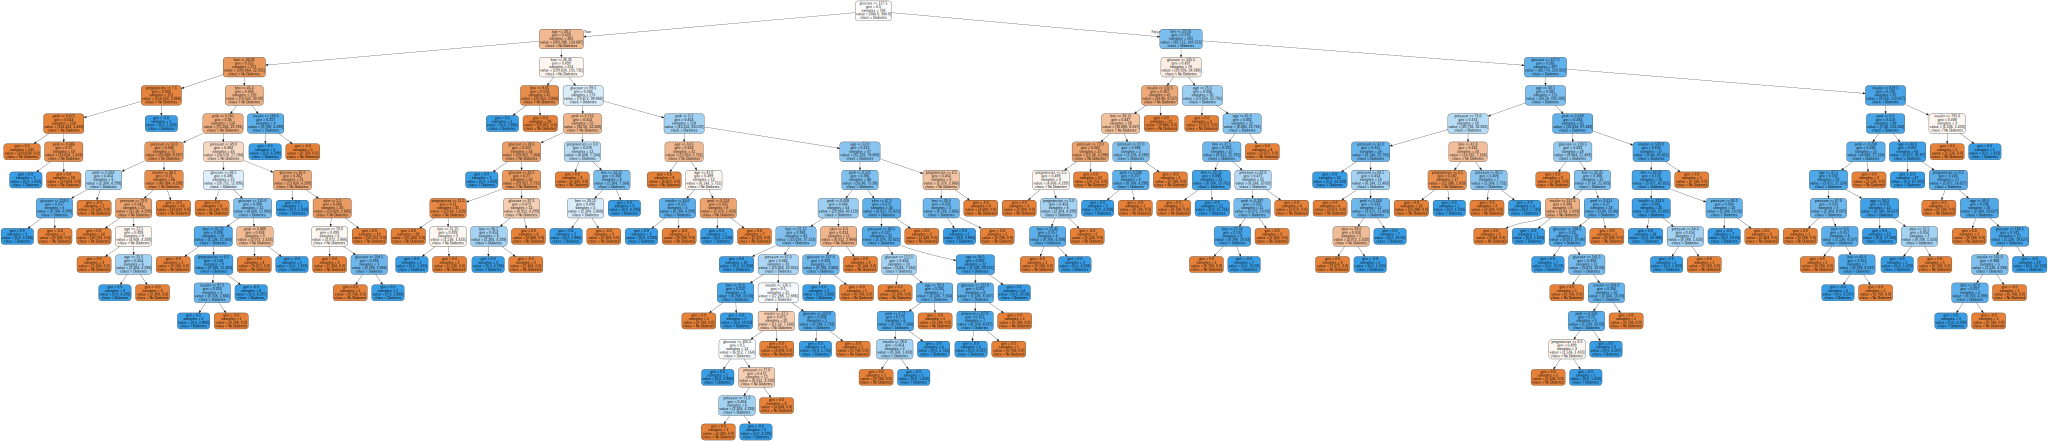

In [9]:
# Displaying a tree
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'

from IPython.display import HTML

from sklearn import tree
from graphviz import Source
from IPython.display import SVG, display
from ipywidgets import interactive


style = "<style>svg{width:70% !important;height:70% !important;}</style>"
HTML(style)

model=DecisionTreeClassifier(class_weight="balanced", random_state=seed)
model.fit(X,y)

graph=Source(tree.export_graphviz(model,
        out_file=None,      
        feature_names=p_indians.columns[0:-1],
        class_names=['No Diabetes','Diabetes'],
        filled=True,
        rounded=True))

display(SVG(graph.pipe(format="svg")))


In [10]:
# Displaying a tree
#    you need to install graphviz
# ! pip install graphviz

from IPython.display import HTML

from sklearn import tree
from graphviz import Source
from IPython.display import SVG, display
from ipywidgets import interactive

seed=7

def plot_tree(crit, split, depth, min_split, min_leaf=1):
    
    indians_tree=DecisionTreeClassifier(random_state=seed,
                criterion=crit,
                splitter=split,
                max_depth=depth,
                min_samples_split=min_split,
                min_samples_leaf=min_leaf)
    indians_tree.fit(X,y)
    
    graph=Source(tree.export_graphviz(indians_tree,
            out_file=None,
            feature_names=p_indians.columns[0:-1],
            class_names=["0","1","2"],
            filled=True,
            rounded=True))
    display(SVG(graph.pipe(format="svg")))
    
    return indians_tree

inter=interactive(plot_tree,
        crit=["gini","entropy"],
        split=["best","random"],
        depth=[None,1,2,3,4],
        min_split=(2,100),
        min_leaf=(1,200))

display(inter)


interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

# Support Vector Machines

Support vector machines seeks a line that separates best two classes. The data instances that are closest to this line are, better separating the classes, are called support vectors. 

Support Vector Machines have the advantage that you can change the kernel function to use. Radial basis function is used by default, a pretty powerful one. 

You can construct a SVM model with the <b>SVC</b> class.

In [11]:
# SVM - Support Vector Machines

from sklearn.svm import SVC

kfold=KFold(n_splits=10, random_state=7)

model=SVC(gamma="scale")

results=cross_val_score(model, X, y, cv=kfold)

print(f'Support Vector Machines - Accuracy {results.mean()*100:.3f}% std {results.std()*100:3f}')

results_scl=cross_val_score(model, X_std, y, cv=kfold)

print(f'SVM (-1..1) - Accuracy {results_scl.mean()*100:.3f}% std {results_scl.std()*100:3f}')

results_minmax=cross_val_score(model, X_minmax, y, cv=kfold)

print(f'SVM ( 0..1) - Accuracy {results_minmax.mean()*100:.3f}% std {results_minmax.std()*100:3f}')

# the importance of scaling depends on the kernel used

res_w1["Res"]=results
res_w1["Type"]="SVM"

res_w2["Res"]=results_scl
res_w2["Type"]="SVM -1..1"

res_w3["Res"]=results_minmax
res_w3["Type"]="SVM 0..1"

resall=pd.concat([resall,res_w1,res_w2,res_w3], ignore_index=True)

Support Vector Machines - Accuracy 76.042% std 5.293077
SVM (-1..1) - Accuracy 76.558% std 5.888387
SVM ( 0..1) - Accuracy 77.083% std 5.108435


# Algorithm Comparison

<Figure size 1080x648 with 0 Axes>

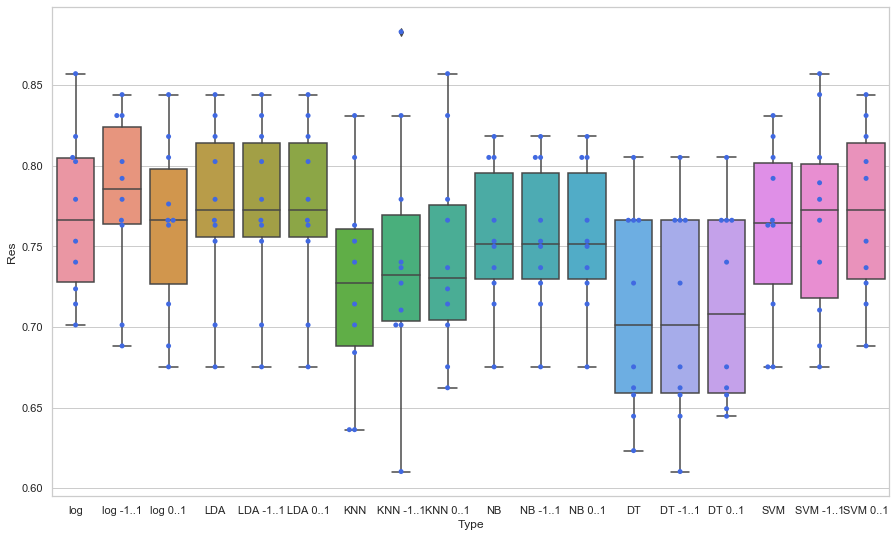

In [12]:
# Now let's compare them all 

plt.figure(figsize=(15,9))

sns.boxplot(data=resall, x="Type", y="Res")

sns.swarmplot(data=resall, x="Type", y="Res", color="royalblue")

<b><font color="red" size=6>Mission 1</font>

a) Do the same with the Times Ranking predicting to be among the 10 best Business Schools.<br><br>
b) Try the Titanic dataset (you'll find all the info that you need in Kaggle). 
<br><br>
</b>

In [13]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#read Dataset
df = pd.read_csv("timesData.csv")

#clean dataset
df["num_students"] = df["num_students"].str.replace(',','')
df["world_rank"] = df["world_rank"].str.replace('=','')
df["international_students"] = df["international_students"].str.replace('%','')
df["female_male_ratio"] = df["female_male_ratio"].str[:2]
df=df[df['year']==2015]
df['world_rank'] = df['world_rank'].str.replace('-', '').astype(int)
df = df.drop(columns="country")
df = df.drop(columns="university_name")
df = df.replace({'-': ''}, regex=True)
df = df.apply(pd.to_numeric)
df = df.dropna()
df.head()

print("#################separate into input and output#######################")
array=df.values
X=array[:,1:11]
y=array[:,:1]
np.set_printoptions(suppress=True)
pd.DataFrame(y).head()
pd.DataFrame(X).head()

#########standardise the Data######################
std_scaler=preprocessing.StandardScaler()
X_std=std_scaler.fit_transform(X)

minmax_scaler=preprocessing.MinMaxScaler()
X_minmax=minmax_scaler.fit_transform(X.astype(np.float))

#########create dataframes for plotting######################
resall=pd.DataFrame()
res_w1=pd.DataFrame()
res_w2=pd.DataFrame()
res_w3=pd.DataFrame()

,world_rank,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1402,1,92.2,67.0,98.1,99.7,89.1,94.3,2243.0,6.9,27.0,33.0,2015
1404,3,88.6,90.7,97.7,95.5,72.9,93.2,19919.0,11.6,34.0,46.0,2015
1405,4,91.5,69.0,96.7,99.1,63.1,92.9,15596.0,7.8,22.0,42.0,2015
1406,5,89.7,87.8,95.6,95.2,51.1,92.0,18812.0,11.8,34.0,46.0,2015
1407,6,89.1,84.3,88.2,100.0,95.7,91.9,11074.0,9.0,33.0,37.0,2015


#################separate into input and output#######################


,0
0,1.0
1,3.0
2,4.0
3,5.0
4,6.0


,0,1,2,3,4,5,6,7,8,9
0,92.2,67.0,98.1,99.7,89.1,94.3,2243.0,6.9,27.0,33.0
1,88.6,90.7,97.7,95.5,72.9,93.2,19919.0,11.6,34.0,46.0
2,91.5,69.0,96.7,99.1,63.1,92.9,15596.0,7.8,22.0,42.0
3,89.7,87.8,95.6,95.2,51.1,92.0,18812.0,11.8,34.0,46.0
4,89.1,84.3,88.2,100.0,95.7,91.9,11074.0,9.0,33.0,37.0


In [14]:
# Logistic Regression on Financial times Data
print("#################### FT Linear Regression###################\n\n")


from sklearn.linear_model import LogisticRegression

kfold=KFold(n_splits=10, random_state=7, shuffle=True)

model=LogisticRegression(solver="liblinear")

results=cross_val_score(model, X, np.ravel(y), cv=kfold)

print(f'Logistic Regression - Accuracy {results.mean()*100:.3f}% std {results.std()*100:3f}')

results_scl=cross_val_score(model, X_std, np.ravel(y), cv=kfold)

print(f'Logistic Regression (-1..1) - Accuracy {results_scl.mean()*100:.3f}% std {results_scl.std()*100:3f}')

results_minmax=cross_val_score(model, X_minmax, np.ravel(y), cv=kfold)

print(f'Logistic Regression ( 0..1) - Accuracy {results_minmax.mean()*100:.3f}% std {results_minmax.std()*100:3f}')

# if the range of variables is large scaling doesn't matter in a log regression 
# but if you are not sure if they are (or you don't want to check ... ) just try ! 

res_w1["Res"]=results
res_w1["Type"]="log"

res_w2["Res"]=results_scl
res_w2["Type"]="log -1..1"

res_w3["Res"]=results_minmax
res_w3["Type"]="log 0..1"

resall=pd.concat([resall,res_w1,res_w2,res_w3], ignore_index=True)


#################### FT Linear Regression###################


Logistic Regression - Accuracy 0.000% std 0.000000
Logistic Regression (-1..1) - Accuracy 0.588% std 1.764706
Logistic Regression ( 0..1) - Accuracy 1.144% std 2.288749


In [15]:
#Linear Discriminant Analysis on FT Data
print("####################Linear Discriminant Analysis on FT Data#########################\n\n")

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

kfold=KFold(n_splits=10, random_state=7)

model=LinearDiscriminantAnalysis()

results=cross_val_score(model, X, np.ravel(y), cv=kfold)

print(f'LDA Linear Discriminant Analysis - Accuracy {results.mean()*100:.3f}% std {results.std()*100:3f}')

results_scl=cross_val_score(model, X_std, np.ravel(y), cv=kfold)

print(f'LDA (-1..1) - Accuracy {results_scl.mean()*100:.3f}% std {results_scl.std()*100:3f}')

results_minmax=cross_val_score(model, X_minmax, np.ravel(y), cv=kfold)

print(f'LDA ( 0..1) - Accuracy {results_minmax.mean()*100:.3f}% std {results_minmax.std()*100:3f}')


res_w1["Res"]=results
res_w1["Type"]="LDA"

res_w2["Res"]=results_scl
res_w2["Type"]="LDA -1..1"

res_w3["Res"]=results_minmax
res_w3["Type"]="LDA 0..1"

resall=pd.concat([resall,res_w1,res_w2,res_w3], ignore_index=True)

####################Linear Discriminant Analysis on FT Data#########################


LDA Linear Discriminant Analysis - Accuracy 5.882% std 6.960094
LDA (-1..1) - Accuracy 5.882% std 6.960094
LDA ( 0..1) - Accuracy 5.294% std 7.180327


In [16]:
# KNN on FT Data
print("########################## K NEAREST NEIGHBORS ON FT##################\n\n")

# KNN Classification

from sklearn.neighbors import KNeighborsClassifier

kfold=KFold(n_splits=10, random_state=7)

model=KNeighborsClassifier()

results=cross_val_score(model, X, y, cv=kfold)

print(f'KNN - Accuracy {results.mean()*100:.3f}% std {results.std()*100:3f}')

results_scl=cross_val_score(model, X_std, y, cv=kfold)

print(f'KNN (-1..1) - Accuracy {results_scl.mean()*100:.3f}% std {results_scl.std()*100:3f}')

results_minmax=cross_val_score(model, X_minmax, y, cv=kfold)

print(f'KNN ( 0..1) - Accuracy {results_minmax.mean()*100:.3f}% std {results_minmax.std()*100:3f}')

# scaling in knn is necessary ...

res_w1["Res"]=results
res_w1["Type"]="KNN"

res_w2["Res"]=results_scl
res_w2["Type"]="KNN -1..1"

res_w3["Res"]=results_minmax
res_w3["Type"]="KNN 0..1"

resall=pd.concat([resall,res_w1,res_w2,res_w3], ignore_index=True)

########################## K NEAREST NEIGHBORS ON FT##################


KNN - Accuracy 0.000% std 0.000000
KNN (-1..1) - Accuracy 0.000% std 0.000000
KNN ( 0..1) - Accuracy 0.000% std 0.000000


In [17]:
##################### TITANIC DATASET REPETITION
from sklearn.model_selection import StratifiedKFold
print("************************repeating the same exercise for the titanic dataset*************************")


df = pd.read_csv("titanic.csv")
df.info()
df.head()
df = df.dropna()
print(df.isnull().sum()/len(df))

#dropping all the non-numerical columns and the ones which don't contain valuable information
df = df.drop(["Name"], axis=1)


df['Sex'] = df["Sex"].str.get_dummies()
df.head()


#splitting the dataset into y and X
array = df.values 
X = array[:,2:7]
y = array[:,[1]]
X.shape
y.shape

##########standardise the Data######################
std_scaler = preprocessing.StandardScaler()
X_std = std_scaler.fit_transform(X)

minmax_scaler=preprocessing.MinMaxScaler()
X_minmax=minmax_scaler.fit_transform(X.astype(np.float))

#########create dataframes for plotting######################
resall=pd.DataFrame()
res_w1=pd.DataFrame()
res_w2=pd.DataFrame()
res_w3=pd.DataFrame()



############## make the list of the algorithms, which we will loop through 

models = [(LogisticRegression(solver="liblinear"), "log", "log -1..1", "log 0..1"),
          (LinearDiscriminantAnalysis(), "LDA", "LDA-1...1", "LDA 0...1"),
          (KNeighborsClassifier(), "KNN", "KNN -1...1", "KNN 0...1")]


############# loop through the models

for elem in models:
    kfold=StratifiedKFold(n_splits=10, random_state=7, shuffle=True)

    model=elem[0]
    
    print('Regression: ', elem[1])
    
    results=cross_val_score(model, X, np.ravel(y), cv=kfold)

    print(f'Accuracy: {results.mean()*100:.3f}% std {results.std()*100:3f}')

    results_scl=cross_val_score(model, X_std, np.ravel(y), cv=kfold)

    print(f'rescaled - Accuracy: {results_scl.mean()*100:.3f}% std {results_scl.std()*100:3f}')

    results_minmax=cross_val_score(model, X_minmax, np.ravel(y), cv=kfold)

    print(f'minmax - Accuracy: {results_minmax.mean()*100:.3f}% std {results_minmax.std()*100:3f}')

    res_w1["Res"]=results
    res_w1["Type"]=elem[1]

    res_w2["Res"]=results_scl
    res_w2["Type"]=elem[2]

    res_w3["Res"]=results_minmax
    res_w3["Type"]=elem[3]

    resall=pd.concat([resall,res_w1,res_w2,res_w3], ignore_index=True)
    
    print("\n")
    print("*****************************************")
    print("\n")
    
print("It seems as if K-Nearest Neighbours Classification gives me the highest accuracy")

************************repeating the same exercise for the titanic dataset*************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
Survived                   887 non-null int64
Pclass                     887 non-null int64
Name                       887 non-null object
Sex                        887 non-null object
Age                        887 non-null float64
Siblings/Spouses Aboard    887 non-null int64
Parents/Children Aboard    887 non-null int64
Fare                       887 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.5+ KB


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


Survived                   0.0
Pclass                     0.0
Name                       0.0
Sex                        0.0
Age                        0.0
Siblings/Spouses Aboard    0.0
Parents/Children Aboard    0.0
Fare                       0.0
dtype: float64


,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


(887, 5)

(887, 1)

Regression:  log
Accuracy: 78.579% std 2.120881
rescaled - Accuracy: 76.663% std 2.263020
minmax - Accuracy: 68.788% std 3.062644


*****************************************


Regression:  LDA
Accuracy: 69.580% std 3.230998
rescaled - Accuracy: 69.580% std 3.230998
minmax - Accuracy: 69.580% std 3.230998


*****************************************


Regression:  KNN
Accuracy: 85.104% std 4.827362
rescaled - Accuracy: 80.603% std 2.908524
minmax - Accuracy: 74.302% std 2.918197


*****************************************


It seems as if K-Nearest Neighbours Classification gives me the highest accuracy
